In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
df = pd.read_csv("/Users/nanda/Downloads/gld_price_data.csv")

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
## correlation
correlatio = df.corr()

<AxesSubplot:>

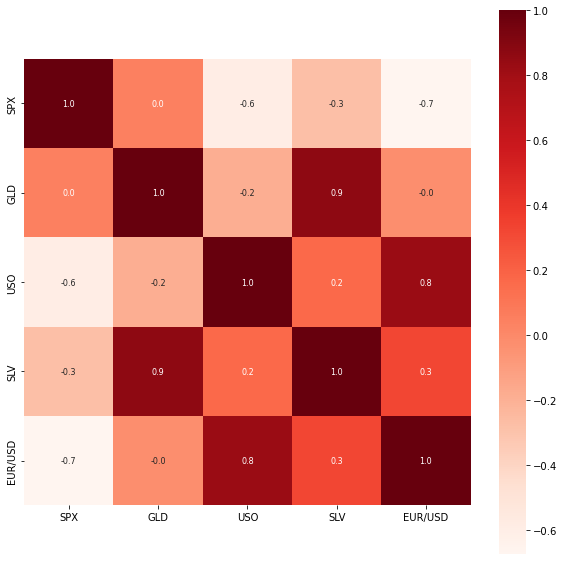

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(correlatio,cmap="Reds",square=True,cbar = True,annot=True,annot_kws={"size":8},fmt=".1f")

In [10]:
print(correlatio["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/Users/nanda/tensorflow-test/env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

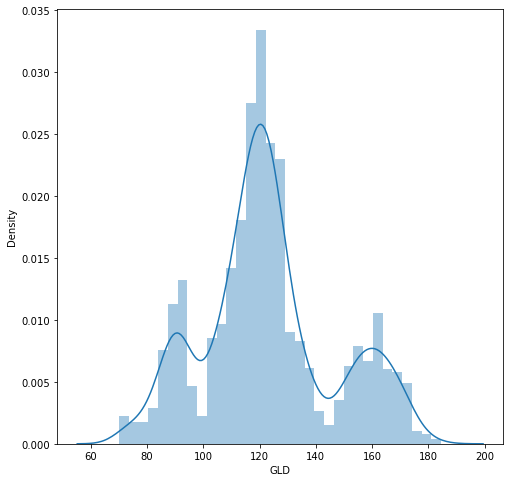

In [14]:
## Checkong the distribution of the gold data
plt.figure(figsize=(8,8))
sns.distplot(df["GLD"])

## Splitting the features and target


In [15]:
X = df.drop(["Date","GLD"],axis = 1)

In [16]:
y = df["GLD"]

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [19]:
model = RandomForestRegressor()

In [21]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [22]:
X_test_prediction = model.predict(X_test)

In [25]:
accuracy = metrics.r2_score(y_test,X_test_prediction)
accuracy

0.9898953366056561

In [26]:
## Plotting the actual and predicted values

In [27]:
y_test = list(y_test)

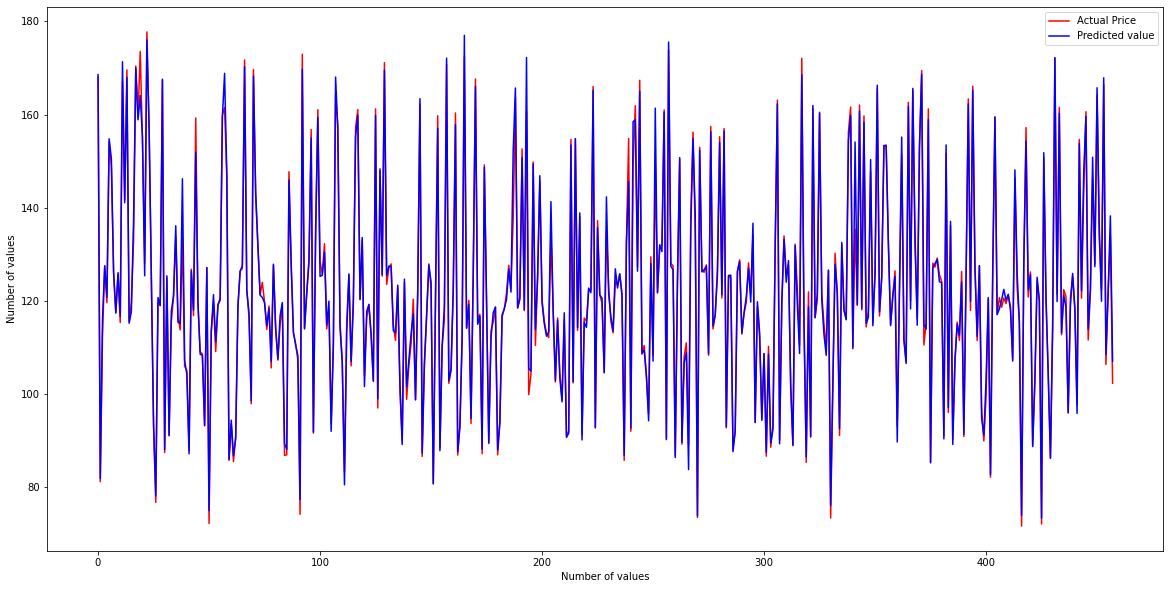

In [32]:
plt.figure(figsize=(20,10))
plt.plot(y_test,color = "red",label="Actual Price" )
plt.plot(X_test_prediction,color = "blue",label="Predicted value")
plt.xlabel("Number of values")
plt.ylabel("Number of values")
plt.legend()
plt.show()
